In [8]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [47]:
v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'HCP_A3', 'LIQUID'],
                 {v.X('ZN'): 0.25, v.NP('LIQUID'): 0.2817,
                  v.P: 1e5}, verbose=True)
print(eq2)

Components: AL VA ZN
Phases: FCC_A1 
HCP_A3 
LIQUID 
[done]
('Composition Sets', [CompositionSet(FCC_A1, [ 0.99443741  0.00556259], NP=0.7536275952711196, GM=-8532.379973486944), CompositionSet(HCP_A3, [  1.00000000e-15   1.00000000e+00], NP=1e-06, GM=-12489.369042318192), CompositionSet(LIQUID, [ 0.00200401  0.99799599], NP=0.2817 [fixed], GM=-8422.501520948985)])
('Chemical Potentials', array([ -8510.24572606, -12489.36904232]))
Trying to improve poor solution
Calculation Failed:  OrderedDict([('N', array(1.0)), ('NP_LIQUID', array(0.2817)), ('P', array(100000.0)), ('X_ZN', array(0.25))]) b'Maximum number of iterations exceeded (can be specified by an option).'
Chemical Potentials [-12517465.66950178 -15025280.56213447]
[  5.81294271e-05   5.81294277e-10   1.31590283e-11   1.19991559e+00
   5.81356924e-05   7.64028211e-05   2.43227114e-04   8.05160807e-05
   2.10000993e-04   5.09211419e+07   8.09266155e-05   2.06352971e-04]
[  1.00000000e+00   1.00000000e+05   4.41745593e+06   1.0297

In [43]:
fcc = calculate(dbf, ['AL', 'ZN', 'VA'], 'FCC_A1',
                 T=(300,2000,20), P=1e5, output='HM', points=[[0.828636,  0.171364]])
liq = calculate(dbf, ['AL', 'ZN', 'VA'], 'LIQUID',
                 T=(300,2000,20), P=1e5, output='HM', points=[[0.549538,  0.450462]])

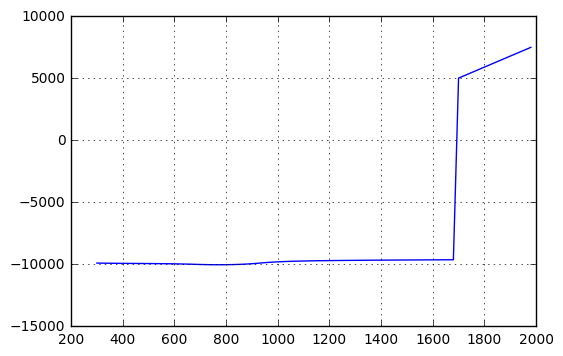

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(fcc['T'], fcc.HM.values.flatten() - liq.HM.values.flatten())
plt.grid(True)

In [6]:
eq2.X

<xarray.DataArray 'X' (N: 1, P: 1, T: 1, X_ZN: 1, vertex: 3, component: 2)>
array([[[[[[ 0.828636,  0.171364],
           [ 0.549538,  0.450462],
           [      nan,       nan]]]]]])
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1e+05
  * T          (T) float64 800.0
  * X_ZN       (X_ZN) float64 0.25
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U2 'AL' 'ZN'